In [201]:
#Import the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [202]:
#Import dataset

data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [203]:
#finding the shape 
data.shape

(9240, 37)

In [204]:
#info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [205]:
#getting summary of the data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [206]:
#check for unique prospectIds
duplicate_prospect_ID = data.duplicated(subset = 'Prospect ID')

print (sum(duplicate_prospect_ID) == 0)  

True


No Duplicates under the Prospect ID


In [207]:
#check for unique prospectIds
duplicate_lead_number = data.duplicated(subset = 'Lead Number')

print (sum(duplicate_lead_number) == 0)  

True


No Duplicates under the Lead Number

From the above, we understand that Prospect ID and Lead Number are variables that define the same customer.
We can drop both the variables as they do not provide us any further insghts and hence it may not be appropriate to keep both the variables.

## EDA on the Dataset 

### Clean the data

- Drop columns which have more than 40% null values 
- Drop some columns which are irrelevant
- Drop variables which won't be of any use in our analysis (example city,country, etc)
- Some columns have 'Select' in their entries, it's basically the value when one doesn't choose any option, replace with null

In [208]:
##drop 'Lead Number' and 'Prospect ID'
data .drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [209]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [210]:
# From the problem statement, 'Select' can be converted to Null.

data = data.replace('Select', np.nan)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [211]:
 ## checking for null values
data.isnull().sum().sum()

54419

In [212]:
 ## checking for null values per column
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [213]:
# Finding the ratio of Null values present in each column
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [214]:
#Remove the columns that have more than 40% of missing values
columns =data.columns

for i in columns:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 40):
        data.drop(i, 1, inplace = True)

In [215]:
# Checking for null ratio after removing the columns which has more than 40% of the Null Values
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### EDA on Categorial variables

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [217]:
#Value counts of Country column
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

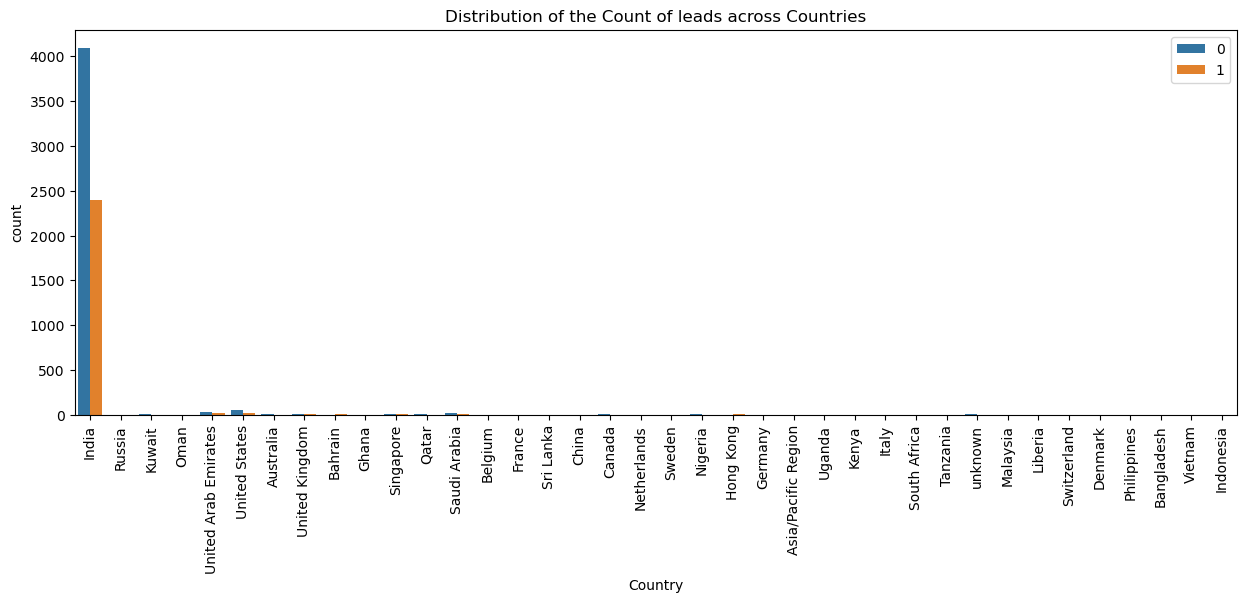

In [219]:
#Visualising the Country column

#Setting the frame
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig = sns.countplot(x='Country', hue='Converted', data=data)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()

In [220]:
# Checking the most frequent Country in th Country Column 
data['Country'].mode()

0    India
Name: Country, dtype: object

In [221]:
# From the above, we can understand that India is the most occuring country in the Country Column.
# Hence we can replace null values with India

data['Country'] = data['Country'].replace(np.nan,'India')

In [222]:
# Checking the value count after imputing the null values
data['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

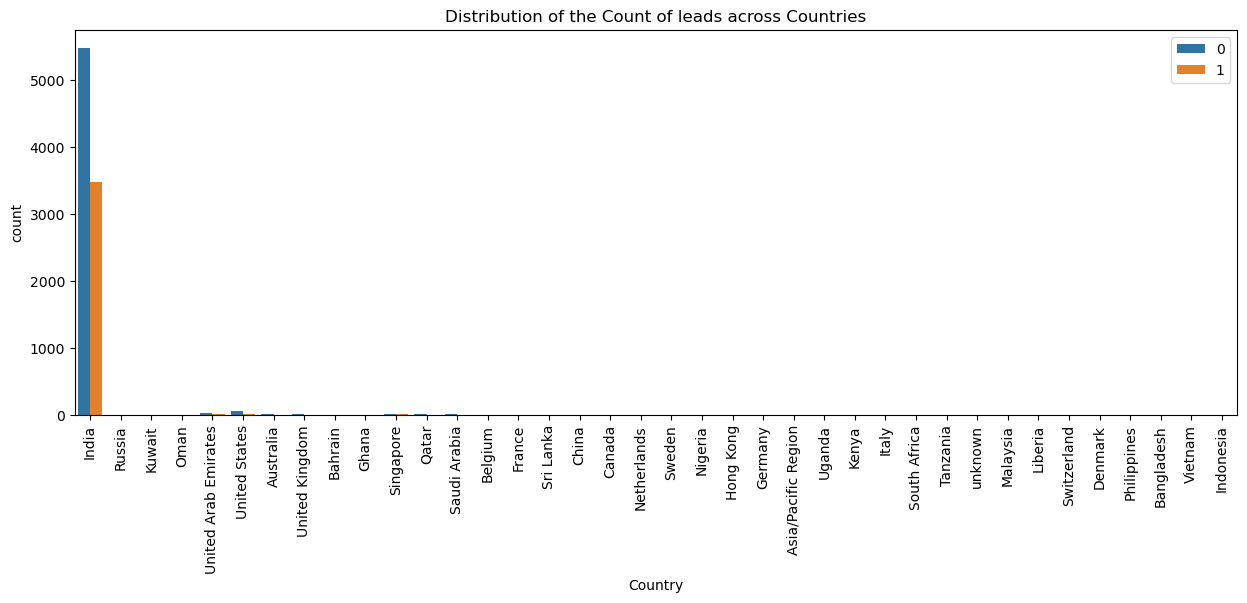

In [223]:
#Visualising the Country column after replacing NaN values

#Setting the frame
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig = sns.countplot(x='Country', hue='Converted', data=data)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()


Since "India" is tagged as the most occuring Country, it may not be suitable for an analysis - especially for a classification problem. Hence we can remove the Country column inorder to escape from the bias.

In [224]:
# Removing Country column frmom data
data.drop('Country',1,inplace=True)

In [225]:
# Checking if Country in present in the data column

"Country" in data.columns

False

In [226]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [227]:
# Checking the City Column

data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [228]:
# Checking for the most frequest value in City 
data['City'].mode()

0    Mumbai
Name: City, dtype: object

Mumbai has been tagged as the most frequently occuring value. hence we can impute Null values with Mumbai


In [229]:
data['City'] = data['City'].replace(np.nan,'Mumbai')


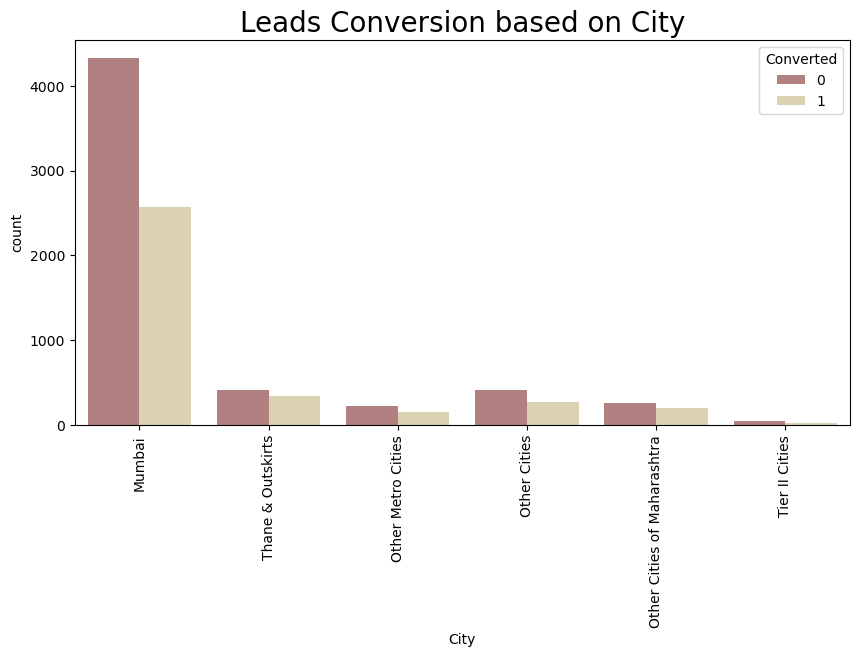

In [230]:
#Visuaising the City columnn after amending Null values

plt.figure(figsize=(10,5))

#Visualising using Countplot
count_fig = sns.countplot(x='City', hue='Converted', data=data, palette='pink')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the figure
plt.title("Leads Conversion based on City",fontsize=20)
plt.show()

Mumbai is the most occuring city

In [231]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [232]:
#checking Specialization column

data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [233]:
# Some customer may not have mentioned specialization as it was not in the list or there aren't any 
# Hence we can impute the NA's as 'Not Specified'

data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

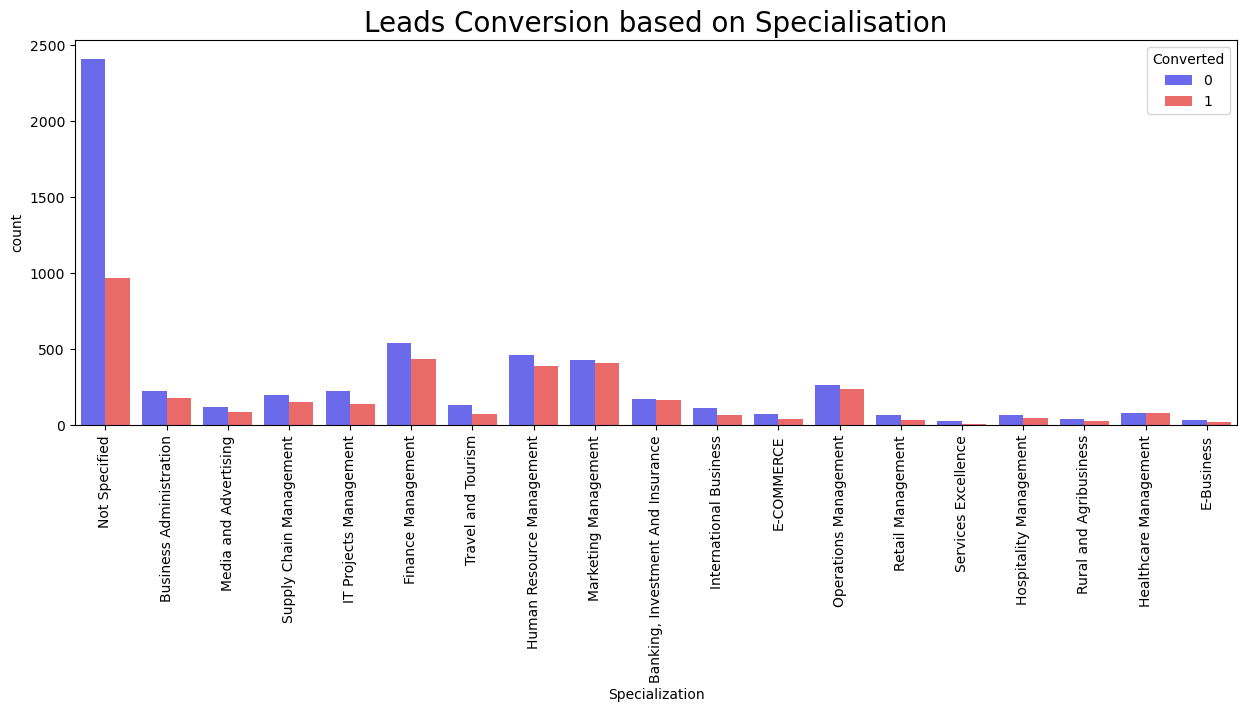

In [234]:
#plotting spread of Specialization columnn 

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x = 'Specialization', hue='Converted', data=data, palette='seismic')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Specialisation",fontsize=20)
plt.show()

**Management** has the  higher number of leads converted. This is importannt and should not be removed.

In [235]:
data['Specialization'].value_counts()


Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [236]:
#Since Management is an import metric insde Specialisation, we could combine the entire Managements under one umbrella
# We will call this combo as Management_Specializations

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

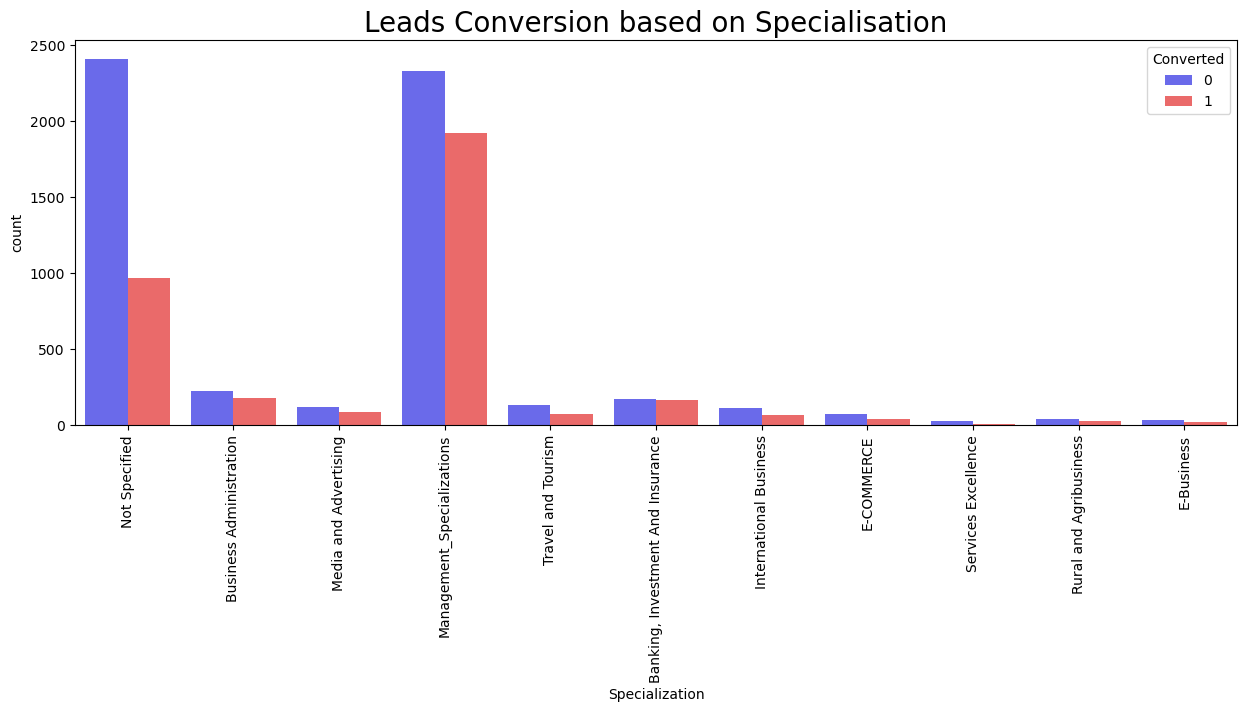

In [237]:
#plotting Specialization column after consolidating the Management Sepcializations

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x='Specialization', hue='Converted', data=data, palette='seismic')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Specialisation",fontsize=20)
plt.show()

In [238]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [239]:
#Checking "What is your current occupation" as it has the most Null values in the above info
#Looking for value counts inside the Occupation

data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since we have most of the Occupation listed under the Occupation column and we can still find NA values, we can impute NA's with "Unemployed"

In [240]:
#Replacing Null values with "Unemployed"

data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [241]:
#Value counts after imputation
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

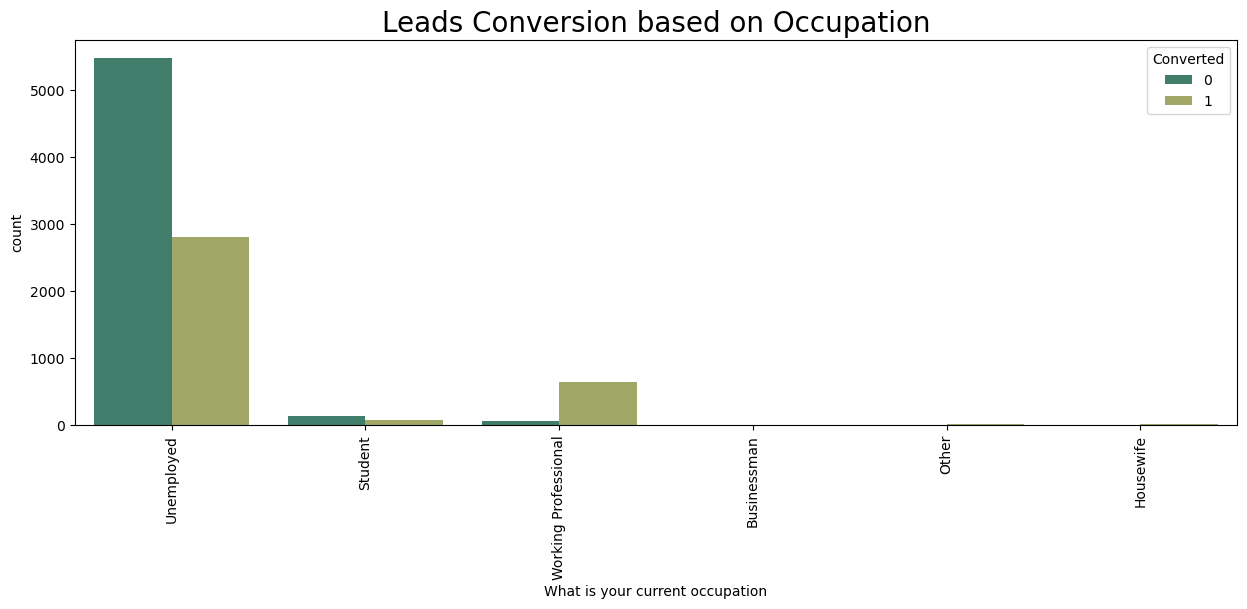

In [242]:
#Visualizing the Employment Variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x ='What is your current occupation', hue='Converted', data=data ,palette='gist_earth')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Occupation",fontsize=20)
plt.show()

In [243]:
#Ratio of categories after imputation
data['What is your current occupation'].value_counts(dropna=False,normalize = True,ascending=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

From the above two analysis, we can understand :
- Chances are high for Working Professionals going for the course.
- Unemployed leads are the most in the leads
- Housewives, Businessman, Student and Other categories may not be converted to join the course

In [244]:
#Rechecking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [245]:
#checking the variable "What matters most to you in choosing a course"

data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [246]:
#replacing Null values with Mode "Better Career Prospects"

data ['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

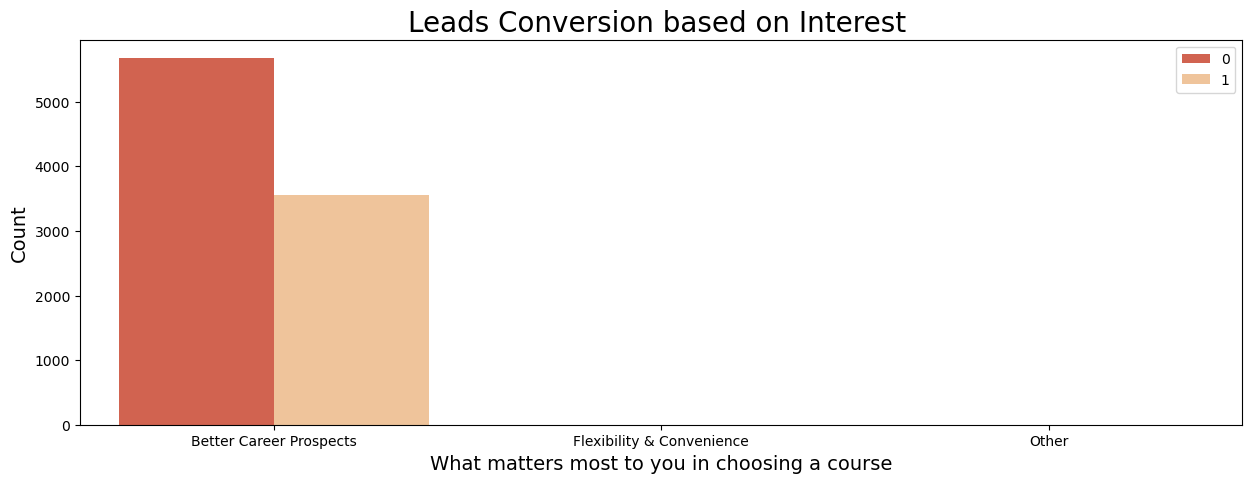

In [247]:
#visualizing Variable "What matters most to you in choosing a course

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=data,palette='OrRd_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Interest ",fontsize=20)
plt.xlabel("What matters most to you in choosing a course", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [248]:
#checking Ratio of variable 
data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

Since "Better Career Prospects" influences the column drastically, we can remove that column as it will create bias

In [249]:
data.drop('What matters most to you in choosing a course',1,inplace=True)


In [250]:
#Rechecking data after removing the variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [251]:
#checking value counts of  variable 'Tag'
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Since the lead has not confirmed on the tag, we can impute Null values as "Not Specified"


In [252]:
#Changing Nan values in Tag with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')

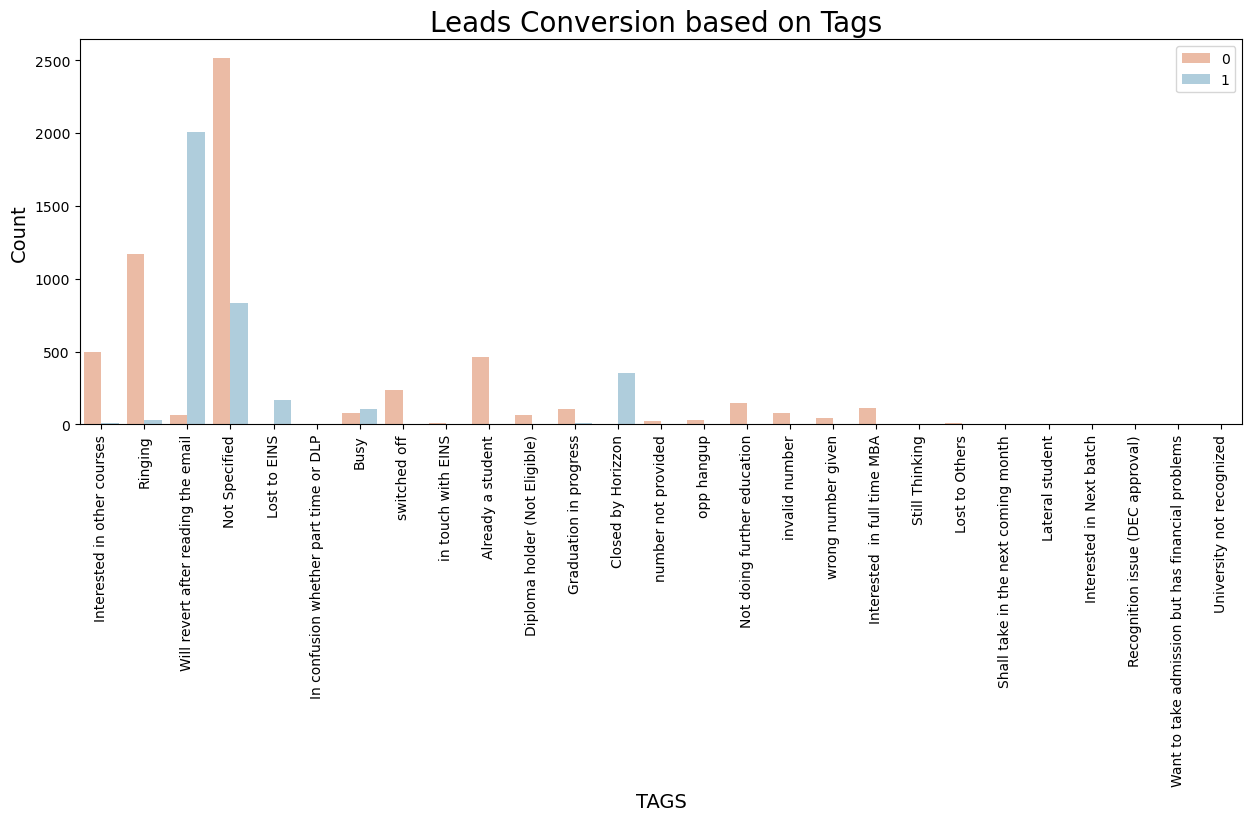

In [253]:
#Countplot on Tag variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x='Tags', hue='Converted', data=data,palette='RdBu')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Tags ",fontsize=20)
plt.xlabel("TAGS", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [254]:
#Since some tags have very minimal values, we can replace them as "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')


In [255]:
# Rechecking the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [256]:
# Checking the null values in the data
data.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [257]:
#checking value counts of Lead Source column

data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Since Lead source has very less null values, we can replace Null as Others



In [258]:
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')

In [259]:
#Also we can combining low frequency values present in the Lead Source

data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

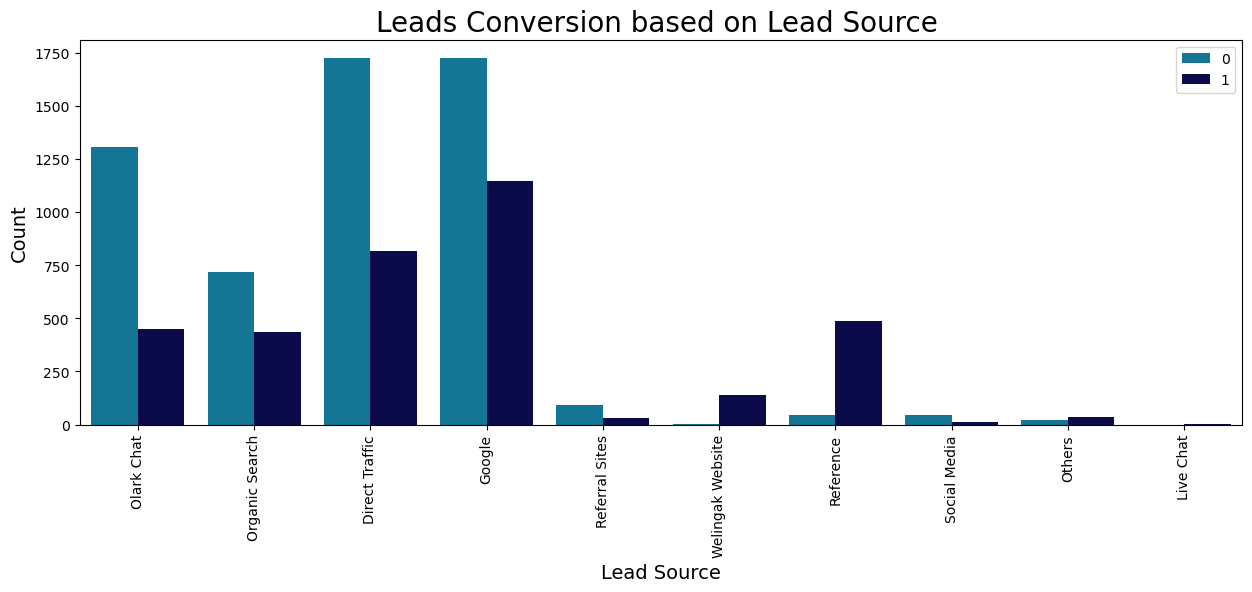

In [260]:
#Countplot on Lead Source variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x='Lead Source', hue='Converted', data=data,palette='ocean_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Lead Source ",fontsize=20)
plt.xlabel("Lead Source", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

### Analysis :
   - Most of the leads generated are through Google and Direct traffic and the least through Live Chat
   - Welingak website ahs the most conversion rate
   - Lead conversion can be improved by maxising leads from Reference and welingak website
   - Focussing Olark chat, Organic search, Direct traffic, and google leads may increase the lead conversion

In [261]:
# Checking Last Activity variable

data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [262]:
# Checking on the ratio of categories

data['Last Activity'].value_counts(dropna=False, normalize = True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [263]:
# Converting Null values to "others"
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')

In [264]:
#replacing categories which are less than 1% to Others as it does not make much impact for analysis

data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [265]:
# Checking the values of the Last Activity Variable

data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [266]:
# Recheck the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [267]:
# Checking the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

Since we have the total NA's less than 2%, we can remove the rows as it will not have effect on the model



In [268]:
#Droping NA values
data = data.dropna()

In [269]:
# Checking the Ratio of the NA variables within the data set
Null_ratio= data.isnull().sum()/len(data.index)
Null_ratio = round(100*(Null_ratio),2)
Null_ratio

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [270]:
#Checking the Lead Origin variable

data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

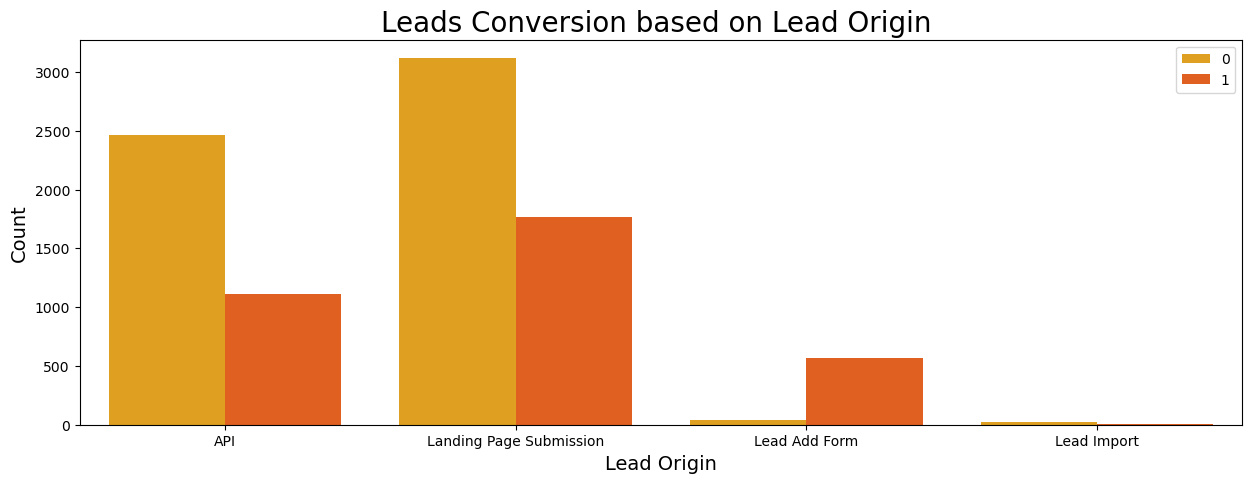

In [271]:
#visualizing count of Variable based on Converted value

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x='Lead Origin', hue='Converted', data=data,palette='autumn_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Lead Origin ",fontsize=20)
plt.xlabel("Lead Origin", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

#### Analysis
- API and Landing Page Submission bring more number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- If Lead add form could get more leads, then the rate of conversion can be very high and for overall growth

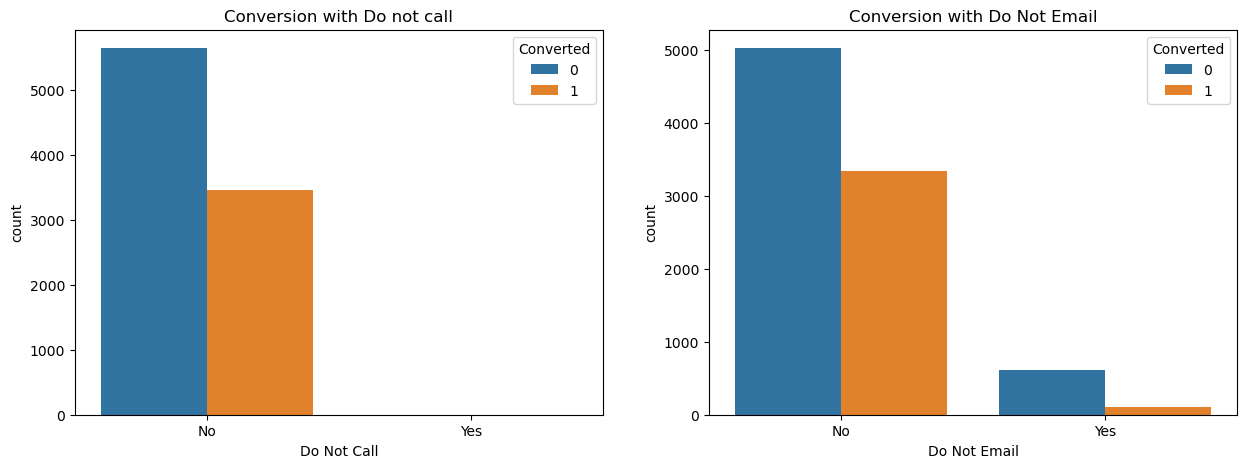

In [272]:
# Checking the variables Do Not Email & Do Not Call using a Subplots

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(x='Do Not Call', hue='Converted', data=data)
plt.title("Conversion with Do not call")

ax2=plt.subplot(1, 2, 2, sharex=ax1)
ax2=sns.countplot(x='Do Not Email', hue='Converted', data=data)
plt.title("Conversion with Do Not Email")
plt.show()

In [273]:
#Evaluating value counts for Do Not Call variable

data['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

Since Do Not Call has No as most occuring category it will create bias . So we can remove this from data


In [274]:
data.drop("Do Not Call", 1, inplace=True)

In [275]:
# Rechecking Data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Converted                                 9103 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9103 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Last Activity                             9103 non-null   object 
 8   Specialization                            9103 non-null   object 
 9   What is your current occupation           9103 non-null   object 
 10  Search                              

In [276]:
#checking value counts for Do Not Email
data['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [277]:
# Ratio of the Do Not Email

data['Do Not Email'].value_counts(dropna=False, normalize = True)*100

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64

#### Checking for categorical variables if they can be dropped

In [278]:
Check_cat_var = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [279]:
for i in Check_cat_var:
    print(i)
    print(data[i].value_counts(dropna=False))
    print("-----------------------------------------------------------")

Search
No     9089
Yes      14
Name: Search, dtype: int64
-----------------------------------------------------------
Magazine
No    9103
Name: Magazine, dtype: int64
-----------------------------------------------------------
Newspaper Article
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
-----------------------------------------------------------
X Education Forums
No     9102
Yes       1
Name: X Education Forums, dtype: int64
-----------------------------------------------------------
Newspaper
No     9102
Yes       1
Name: Newspaper, dtype: int64
-----------------------------------------------------------
Digital Advertisement
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
-----------------------------------------------------------
Through Recommendations
No     9096
Yes       7
Name: Through Recommendations, dtype: int64
-----------------------------------------------------------
Receive More Updates About Our Courses
No    9103
Name: Receive Mor

From the above we can understand that the variables listed under cols_to_drop can be dropped.



In [280]:
data.drop(Check_cat_var,1, inplace=True)


In [281]:
#checking value counts of last Notable Activity
data ['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [282]:
#We can consolidate the categories that has less than 1% occurance on the Last Notable Activity

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

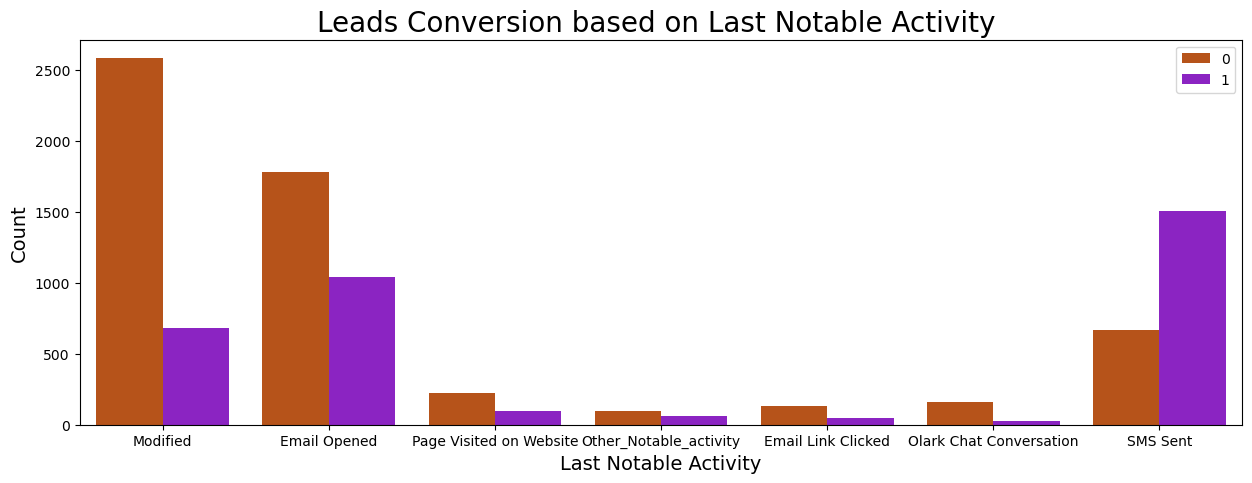

In [283]:
#visualizing count of Variable based on Converted value

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(x='Last Notable Activity', hue='Converted', data=data,palette='gnuplot_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Last Notable Activity ",fontsize=20)
plt.xlabel("Last Notable Activity", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

## Analysis:
   - SMS Sent has more converion than any of the activity
   - Seems Modified has the least conversion ratio
   - Also, Other Notable Activity also has almost very signifiable reason for conversion

In [284]:
#Count of categories under Last Notable Activity

data['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [285]:
# Checking the ratio of the Notable Activity
data['Last Notable Activity'].value_counts(normalize = True)* 100

Modified                   35.922223
Email Opened               31.055696
SMS Sent                   23.860266
Page Visited on Website     3.493354
Olark Chat Conversation     2.010326
Email Link Clicked          1.900472
Other_Notable_activity      1.757662
Name: Last Notable Activity, dtype: float64

In [286]:
#Checking the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### EDA on Numerical variables

In [287]:
data['Converted'].value_counts()


0    5642
1    3461
Name: Converted, dtype: int64

In [288]:
data['Converted'].value_counts(normalize=True)*100

0    61.979567
1    38.020433
Name: Converted, dtype: float64

Conversion rate is 38%

#### Analysing the numerical variables on Correlation


##### Heatmap

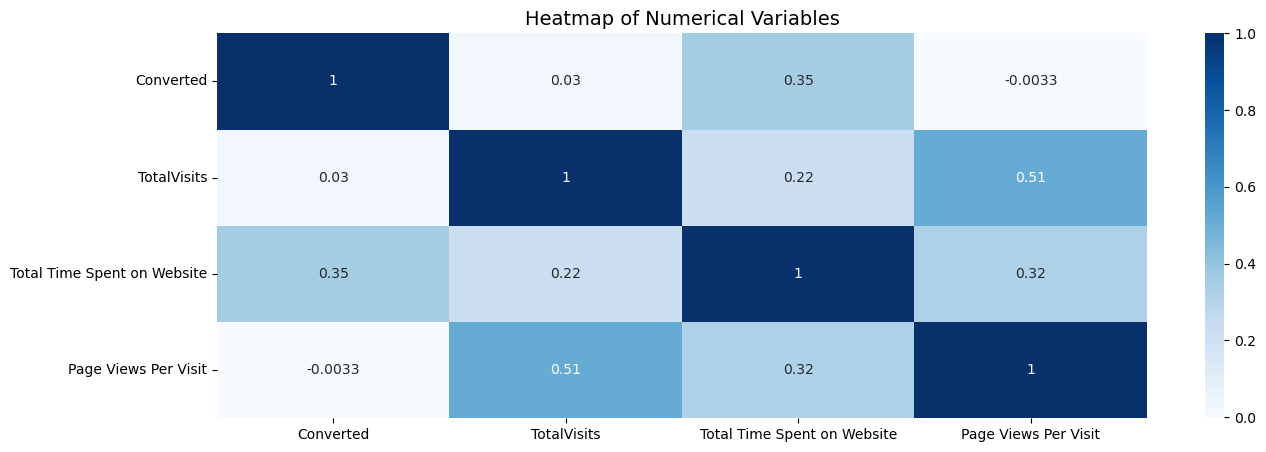

In [289]:
#Setting the frame
plt.figure(figsize=(15,5))

# Correlation Heatmap
sns.heatmap(data.corr(), cmap="Blues", annot=True)
plt.title("Heatmap of Numerical Variables",fontsize=14)
plt.show()

##### BoxPlots

In [290]:
# Analysing the Total Time Spent on Website variable
data['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

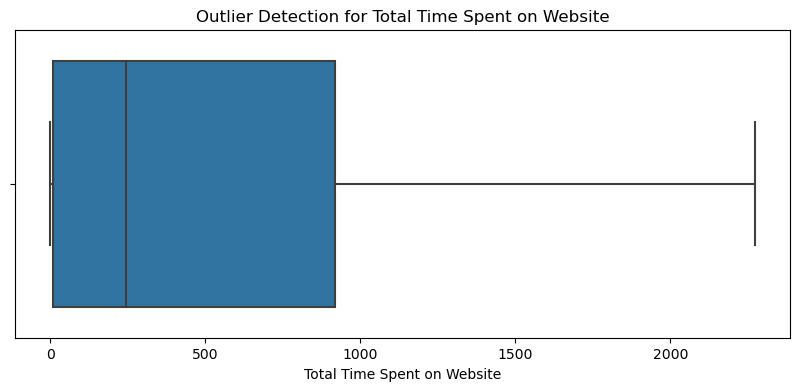

Median of "Total Time Spent on Website" is  244.0


In [291]:
#Outlier Detection of numeric variable using boxplot
# Boxplots to detect outliers
def plot_boxplot(variable, title):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[variable])
    plt.title(title)
    plt.show()

# Total Time Spent on Website
plot_boxplot('Total Time Spent on Website', 'Outlier Detection for Total Time Spent on Website')

print ('Median of "Total Time Spent on Website" is ', data['Total Time Spent on Website'].median())

There are no Outlier for the Total Time Spent on the website, hence no action required for this variable

In [292]:
# Analysing the Total Time Spent on Website variable
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

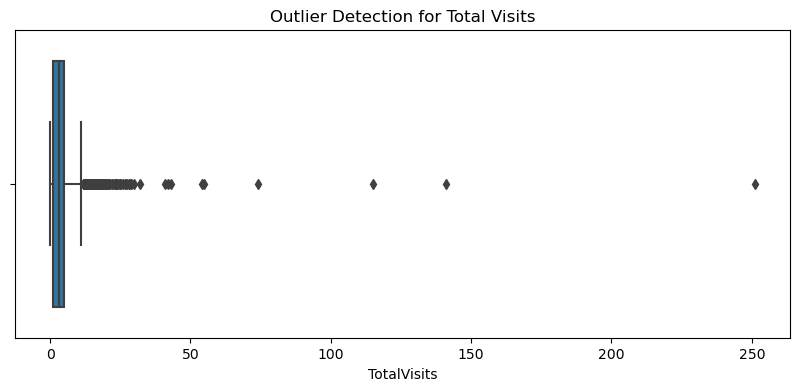

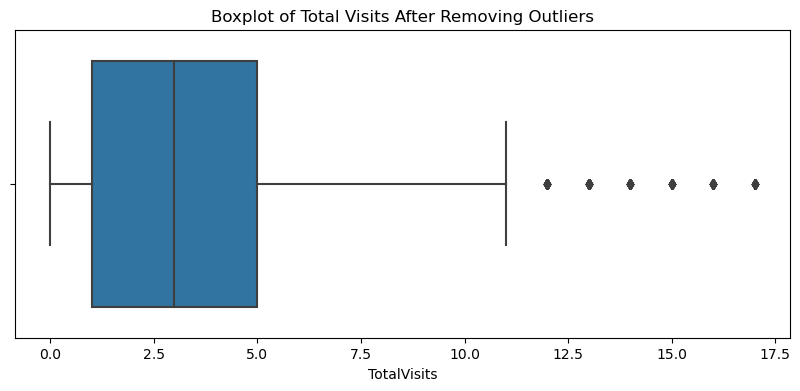

Median of TotalVisits is 3.0


In [293]:
#Setting the figure

# Total Visits
plot_boxplot('TotalVisits', 'Outlier Detection for Total Visits')
Q3 = data['TotalVisits'].quantile(0.99)
Q1 = data['TotalVisits'].quantile(0.01)
data = data[(data['TotalVisits'] <= Q3) & (data['TotalVisits'] >= Q1)]
plot_boxplot('TotalVisits', 'Boxplot of Total Visits After Removing Outliers')


print ('Median of TotalVisits is', data['TotalVisits'].median())

In [294]:
data.shape

(9020, 14)

In [295]:
#Analysing Page Views Per Visit

data['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

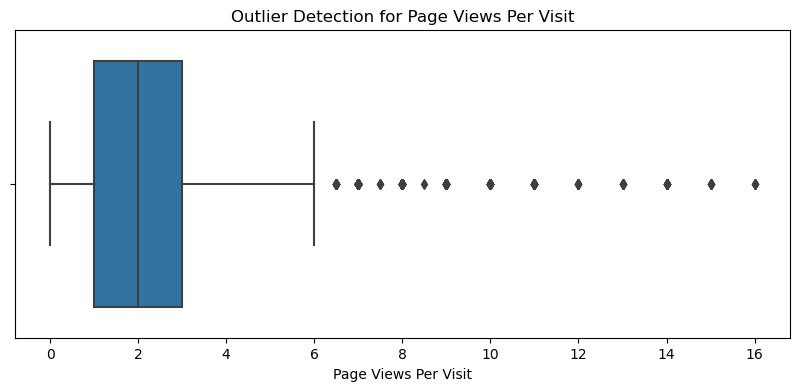

Median of Page Views Per Visit is 2.0


In [296]:
# Page Views Per Visit
plot_boxplot('Page Views Per Visit', 'Outlier Detection for Page Views Per Visit')
print ('Median of Page Views Per Visit is', data['Page Views Per Visit'].median())


Since there are Outliers present in the data, we need to remove them. We will cap it at 1%

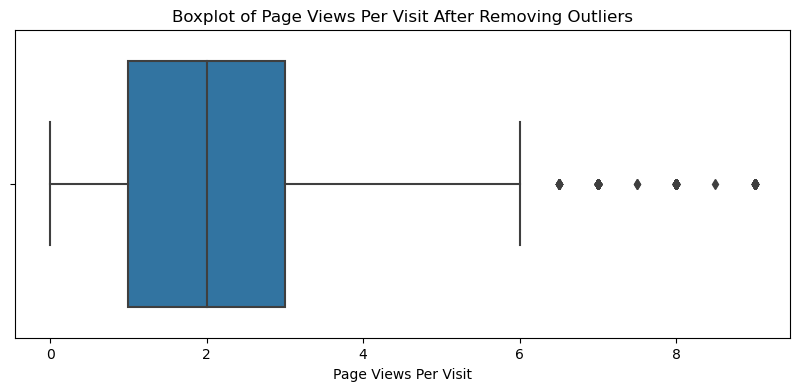

In [297]:
#Boxplot for  Page Views Per Visit
Q3 = data['Page Views Per Visit'].quantile(0.99)
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[(data['Page Views Per Visit'] <= Q3) & (data['Page Views Per Visit'] >= Q1)]
plot_boxplot('Page Views Per Visit', 'Boxplot of Page Views Per Visit After Removing Outliers')


In [298]:
#Checking on the shape of the dataset 
data.shape

(8953, 14)

In [299]:
# Checking the total null values inside the data
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

No NA values present in the data



## Model Preparation

In [300]:
#Fetch list of categorical columns present in the data

categorical_vals= data.select_dtypes(include=['object']).columns
categorical_vals

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [301]:
#Check of mapping required
for i in categorical_vals:
    print(i)
    print(data[i].value_counts())
    print(" ")

Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64
 
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64
 
Do Not Email
No     8256
Yes     697
Name: Do Not Email, dtype: int64
 
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: Last Activity, dtype: int64
 
Specialization
Management_Specializations           4126
Not Specified                        3284
Bus

In [302]:
# Binary Encoding for 'Yes'/'No' variables
binary_map_vars = ['A free copy of Mastering The Interview', 'Do Not Email']
data[binary_map_vars] = data[binary_map_vars].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# One-Hot Encoding for other categorical variables
categorical_vars = ['Lead Origin', 'What is your current occupation', 'City', 'Specialization', 'Lead Source', 'Last Activity', 'Last Notable Activity', 'Tags']
# Since we have created dummy variables for all the categorical variables, we can remove the original columns from the data
#dropping the original columns after dummy variable creation
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

In [311]:
# Checking if the mapping has gone through

data[map_var].head()

,A free copy of Mastering The Interview,Do Not Email
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [313]:
#Checking the data to see if the applied EDA is clear
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,NaN,0,0.0,0,0.0,NaN,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,NaN,0,5.0,674,2.5,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,NaN,1,2.0,1532,2.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,NaN,0,1.0,305,1.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,NaN,1,2.0,1428,1.0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [121]:
# Checking if we have any categorical variable present in the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Housewife             8953 non-null   uint8  
 8   What is your current occupation_Other                 8953

## Creating Model

### Model Building: Logistic Regression

#### Splitting the data into Training and Testing Set 

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = data['Converted'] # Target Variable

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [123]:
# Independent Variables
X=data.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [124]:
# Splitting into train and test data at 70/30 Ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [125]:
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,5.0,1490,5.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,3.0,457,3.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,4.0,126,2.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,2.0,393,2.00,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,4.0,1167,1.33,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [126]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,5.0,311,2.5,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,3.0,183,3.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,2.0,913,2.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,4.0,141,2.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,3.0,252,3.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [130]:
X_train.shape

(6267, 56)

In [131]:
X_test.shape

(2686, 56)

In [127]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [128]:
y_test.head()

7681    0
984     0
8135    0
6915    0
2712    1
Name: Converted, dtype: int64

In [132]:
y_train.shape

(6267,)

In [133]:
y_test.shape

(2686,)

### Scaling of Data using Standard Scaler

In [314]:
# Scaling the data
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [315]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


###  Building Logistic Regression using Stats Model & RFE:

In [317]:
# Importing Statsmodels
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Recursive Feature Elimination
logreg = LogisticRegression() #Creating an instance of Logistic Regression
rfe = RFE(estimator=logreg, n_features_to_select=15)  # running RFE with 15 variables 
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

#printing the Output 
rfe.support_


array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [318]:
# Combining the data to understand the full RFE data
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [319]:
# checking the rfe Supported columns
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [320]:
# listing the columns which are not supported by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Sourc

In [321]:
#Model building with selected features
X_train_sm = sm.add_constant(X_train[selected_features])
log_model1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log_model1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Mon, 12 Aug 2024   Deviance:                       2509.3
Time:                        01:48:17   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Remove the variable that has highest P-value. Source_Referral Sites has the highest P-value and that should be dropped for further analysis

In [322]:
# Drop variables with high p-values
selected_features = selected_features.drop('Lead Source_Referral Sites')

In [324]:
#Model 2 after removing the Lead Source Referral Sites
X_train_sm = sm.add_constant(X_train[selected_features])
log_model2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log_model2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Mon, 12 Aug 2024   Deviance:                       2510.7
Time:                        01:49:47   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6047
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### all the variables have their the p-values equal to 0. So we can check for the VIF Variance Inflation Factor for checking if there are any correlation between the variables

 #### VIF Variance Inflation Factor for checking correlation between variables

In [325]:
#Importing VIF from Stasmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_features].values, i) for i in range(X_train[selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


#### There is a high correlation between two variables Last Notable Activity_SMS Sent and Last Activity_SMS Sent,  so we need drop the variables one by one based on their values

In [326]:
# Drop variable with high VIF
selected_features = selected_features.drop('Last Notable Activity_SMS Sent')

In [328]:
# Logistic Model 3
X_train_sm = sm.add_constant(X_train[selected_features])
log_model3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log_model3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Mon, 12 Aug 2024   Deviance:                       2526.6
Time:                        01:52:43   Pearson chi2:                 8.51e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6037
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [330]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_features].values, i) for i in range(X_train[selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


#### Since all the values are below 5, we can go ahead to interpret Probabilities, Lead Score and  Predictions on Train Data

In [331]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [332]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [333]:
#Converting the predicted variable into a dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [334]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [371]:
# Now we can check how the model performs using the Confusion Matrix

# Importing metrics from SKlearn

from sklearn import metrics

# Predictions
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [372]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print("Confusion Matrix:\n", confusion_matrix)


Confusion Matrix:
 [[3693  189]
 [ 281 2104]]


In [375]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

print("Accuracy:", accuracy)
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

Accuracy: 0.9250039891495133
True positive is  2104
True negatives is  3693
False positives is  189
False negatives is  281


#### There is a very good predition with the model


#### Checking on the sensitivity and Specificity

In [376]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  88.22 %


In [377]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  95.13 %


In [378]:
# Calculate False Postive Rate
#In technical terms, the false positive rate is defined as the probability of falsely rejecting the null hypothesis.

print(FP/ float(TN+FP))

0.04868624420401855


In [379]:
# positive predictive value 
print (TP / float(TP+FP))

0.9175752289576974


In [380]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9292903875188727


#### From the above Analysis, it clear that we have a very good predictive model

#### ROC CURVE

In [382]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score

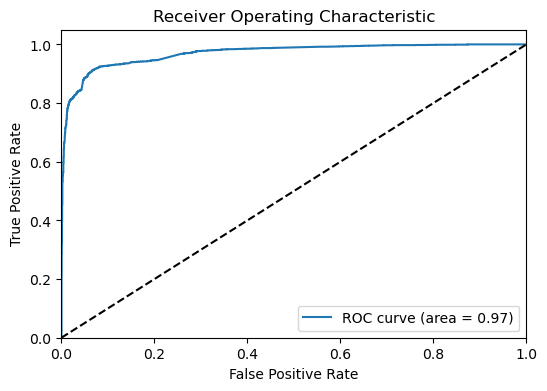

AUC: 0.9698264418803335


In [383]:
# Plot ROC curve
auc_score = draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
print('AUC:', auc_score)

#### Generally, the ROC Curve should be a value close to 1 to be a good model. Here we are getting a good value of 0.97 indicating a good predictive model.

### Finding Optimal Cutoff Point

In [389]:
# Let's create columns with different probability cutoffs 
cutoffs = [float(x) / 10 for x in range(10)]
for cutoff in cutoffs:
    y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > cutoff else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1,0.283149,0,1,1,1,0,0,0,0,0,0,0
4696,0,0.031440,0,1,0,0,0,0,0,0,0,0,0
3274,0,0.576636,0,1,1,1,1,1,1,0,0,0,0
2164,0,0.006433,0,1,0,0,0,0,0,0,0,0,0
1667,1,0.989105,1,1,1,1,1,1,1,1,1,1,1


In [399]:
# Find Optimal Cutoff
cutoffs = [float(x) / 10 for x in range(10)]
for cutoff in cutoffs:
    y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > cutoff else 0)
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
    sensitivity = TP / float(TP + FN)
    specificity = TN / float(TN + FP)
    print(f"Cutoff {cutoff} - Sensitivity: {sensitivity}, Specificity: {specificity}, Accuracy: {accuracy}")


Cutoff 0.0 - Sensitivity: 1.0, Specificity: 0.0, Accuracy: 0.38056486357108665
Cutoff 0.1 - Sensitivity: 0.9714884696016771, Specificity: 0.7207624935600206, Accuracy: 0.8161799904260412
Cutoff 0.2 - Sensitivity: 0.9312368972746331, Specificity: 0.8825347758887172, Accuracy: 0.9010690920695708
Cutoff 0.3 - Sensitivity: 0.9169811320754717, Specificity: 0.9265842349304482, Accuracy: 0.922929631402585
Cutoff 0.4 - Sensitivity: 0.9014675052410901, Specificity: 0.9407521895929933, Accuracy: 0.9258018190521781
Cutoff 0.5 - Sensitivity: 0.8821802935010482, Specificity: 0.9513137557959814, Accuracy: 0.9250039891495133
Cutoff 0.6 - Sensitivity: 0.8280922431865828, Specificity: 0.9698608964451314, Accuracy: 0.9159087282591352
Cutoff 0.7 - Sensitivity: 0.810062893081761, Specificity: 0.98145285935085, Accuracy: 0.9162278602202011
Cutoff 0.8 - Sensitivity: 0.7748427672955975, Specificity: 0.9871200412158682, Accuracy: 0.9063347694271582
Cutoff 0.9 - Sensitivity: 0.7182389937106918, Specificity: 0.

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


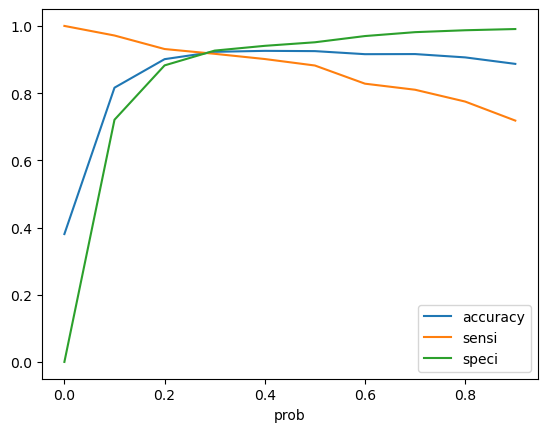

In [400]:
# Let's plot accuracy sensitivity and specificity for various probabilities along a tabular structure.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [401]:
# Choose an optimal cutoff at 0.3
optimal_cutoff = 0.3
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > optimal_cutoff else 0)
final_accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Final_Predicted'])
final_confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['Final_Predicted'])
print("Optimal Accuracy:", final_accuracy)
print("Optimal Confusion Matrix:", final_confusion_matrix)

Optimal Accuracy: 0.922929631402585
Optimal Confusion Matrix: [[3597  285]
 [ 198 2187]]


In [402]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
9196,1,0.283149,0,1,1,1,0,0,0,0,0,0,0,0
4696,0,0.031440,0,1,0,0,0,0,0,0,0,0,0,0
3274,0,0.576636,0,1,1,1,1,1,1,0,0,0,0,1
2164,0,0.006433,0,1,0,0,0,0,0,0,0,0,0,0
1667,1,0.989105,1,1,1,1,1,1,1,1,1,1,1,1


In [404]:
y_train_pred_final

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
9196,1,0.283149,0,1,1,1,0,0,0,0,0,0,0,0,28
4696,0,0.031440,0,1,0,0,0,0,0,0,0,0,0,0,3
3274,0,0.576636,0,1,1,1,1,1,1,0,0,0,0,1,58
2164,0,0.006433,0,1,0,0,0,0,0,0,0,0,0,0,1
1667,1,0.989105,1,1,1,1,1,1,1,1,1,1,1,1,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,1,0.787209,0,1,1,1,1,1,1,1,1,0,0,1,79
84,1,0.942976,1,1,1,1,1,1,1,1,1,1,1,1,94
8313,0,0.002799,0,1,0,0,0,0,0,0,0,0,0,0,0
7169,0,0.130813,0,1,1,0,0,0,0,0,0,0,0,0,13


In [405]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Final_Predicted,Lead_Score
9196,1,0.283149,0,28
4696,0,0.031440,0,3
3274,0,0.576636,1,58
2164,0,0.006433,0,1
1667,1,0.989105,1,99


In [407]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.922929631402585

In [408]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3597,  285],
       [ 198, 2187]])

In [409]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [410]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169811320754717

In [411]:
# Let us calculate specificity
TN / float(TN+FP)

0.9265842349304482

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%


Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [412]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07341576506955177


In [413]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8847087378640777


In [414]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9478260869565217


In [416]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]])

In [417]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8847087378640777

In [418]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [420]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted)

0.8847087378640777

In [421]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9169811320754717

In [423]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

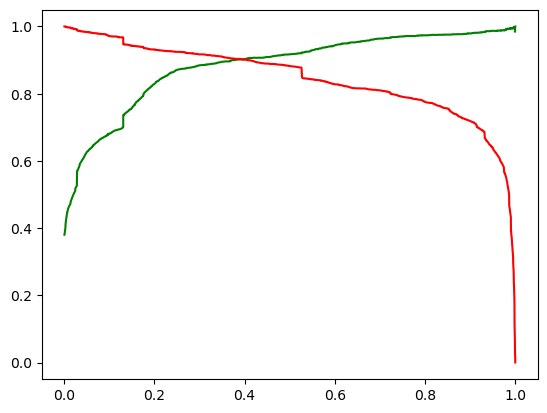

In [424]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [425]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [426]:
X_test.columns


Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellen

### Evaluate on Test Set



In [429]:
# Test data predictions
X_test_sm = sm.add_constant(X_test[selected_features])
y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Converted': y_test.values, 'Converted_prob': y_test_pred})
y_test_pred_final['Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > optimal_cutoff else 0)



In [430]:
# Test accuracy
test_accuracy = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9277736411020104


In [431]:
# Test confusion matrix
test_confusion_matrix = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print("Test Confusion Matrix:", test_confusion_matrix)


Test Confusion Matrix: [[1563  113]
 [  81  929]]


In [432]:
# Sensitivity and Specificity on Test Data
TP_test = test_confusion_matrix[1, 1]
TN_test = test_confusion_matrix[0, 0]
FP_test = test_confusion_matrix[0, 1]
FN_test = test_confusion_matrix[1, 0]

test_sensitivity = round(TP_test / float(TP_test + FN_test) * 100, 2)
test_specificity = round(TN_test / float(TN_test + FP_test) * 100, 2)

print('Test Sensitivity:', test_sensitivity, '%')
print('Test Specificity:', test_specificity, '%')

Test Sensitivity: 91.98 %
Test Specificity: 93.26 %


### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

## Final Observation:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

### <u> Test Data: </u>
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

The Model seems to predict the Conversion Rate very well and accurately.